In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [9]:
# Load the data
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [10]:
# Choose a shallow classification baseline model (Decision Tree)
baseline_model = DecisionTreeClassifier()


In [12]:
# Train the baseline model using 5-fold cross-validation
baseline_scores = cross_val_score(baseline_model, x_train, y_train, cv=5)

In [13]:
print("Baseline Model Accuracy: %0.2f (+/- %0.2f)"% (baseline_scores.mean(), baseline_scores.std() * 2))

Baseline Model Accuracy: 0.83 (+/- 0.01)


In [14]:
# Utilize the bagging method with the base estimator (baseline model)
bagging_model = BaggingClassifier(base_estimator=baseline_model, n_estimators=20, random_state=0)
bagging_scores = cross_val_score(bagging_model, x_train, y_train, cv=5)
print("Bagging Model Accuracy: %0.2f (+/- %0.2f)" % (bagging_scores.mean(), bagging_scores.std() * 2))

c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

KeyboardInterrupt: 

In [16]:
# Utilize the boosting method with the base estimator (baseline model)
boosting_model = AdaBoostClassifier(base_estimator=baseline_model, n_estimators=20, random_state=0)
boosting_scores = cross_val_score(boosting_model, x_train, y_train, cv=5)
print("Boosting Model Accuracy: %0.2f (+/- %0.2f)" % (boosting_scores.mean(), boosting_scores.std() * 2))

c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

Boosting Model Accuracy: 0.83 (+/- 0.01)


In [17]:
# Validate the trained models on the testing set
baseline_model.fit(x_train, y_train)
# bagging_model.fit(x_train, y_train)
boosting_model.fit(x_train, y_train)

baseline_test_accuracy = accuracy_score(y_test, baseline_model.predict(x_test))
# bagging_test_accuracy = accuracy_score(y_test, bagging_model.predict(x_test))
boosting_test_accuracy = accuracy_score(y_test, boosting_model.predict(x_test))


c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [18]:
print("Baseline Model Test Accuracy: %0.2f" % baseline_test_accuracy)
# print("Bagging Model Test Accuracy: %0.2f" % bagging_test_accuracy)
print("Boosting Model Test Accuracy: %0.2f" % boosting_test_accuracy)

Baseline Model Test Accuracy: 0.83
Boosting Model Test Accuracy: 0.83


c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amitg\AppData\Local\Temp\ipykernel_19768\2195665309.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_pca = axs[0].scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
C:\Users\amitg\AppData\Local\Temp\ipykernel_19768\2195665309.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_lda = axs[1].scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)


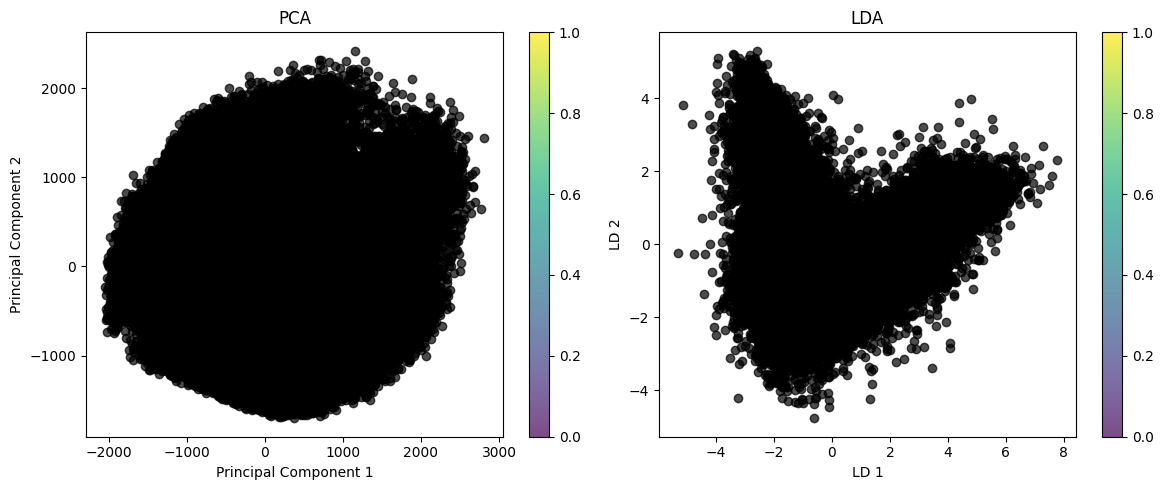

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = lda.fit_transform(x_train, y_train)

# Create two separate figures for PCA and LDA
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot PCA
scatter_pca = axs[0].scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
axs[0].set_title('PCA')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
fig.colorbar(scatter_pca, ax=axs[0])

# Plot LDA
scatter_lda = axs[1].scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='viridis', alpha=0.7)
axs[1].set_title('LDA')
axs[1].set_xlabel('LD 1')
axs[1].set_ylabel('LD 2')
fig.colorbar(scatter_lda, ax=axs[1])

plt.tight_layout()
plt.show()

 



c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


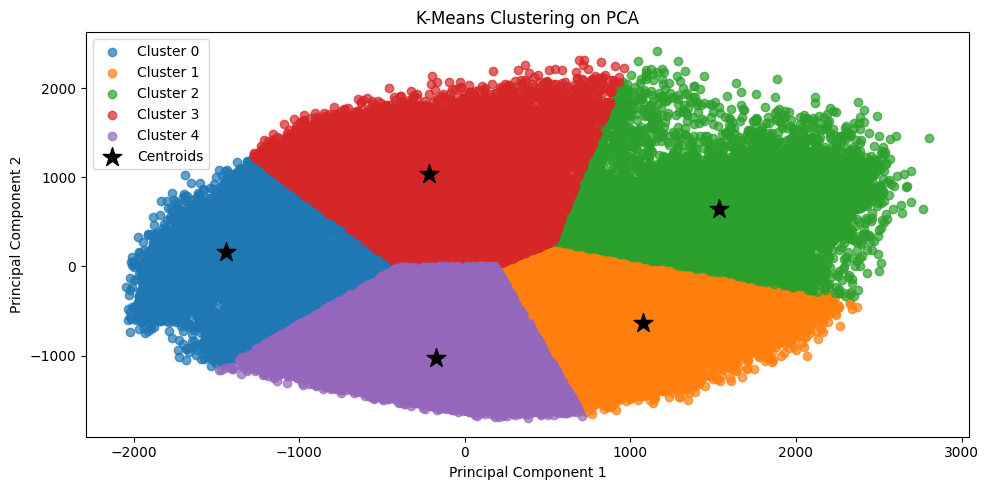

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_train_pca)

# Predict cluster labels
cluster_labels = kmeans.predict(x_train_pca)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot PCA with clustered data points
plt.figure(figsize=(10, 5))

for i in range(5):  # Assuming 5 clusters
    plt.scatter(x_train_pca[cluster_labels == i][:, 0], 
                x_train_pca[cluster_labels == i][:, 1],
                label=f'Cluster {i}',
                alpha=0.7)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.title('K-Means Clustering on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\amitg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


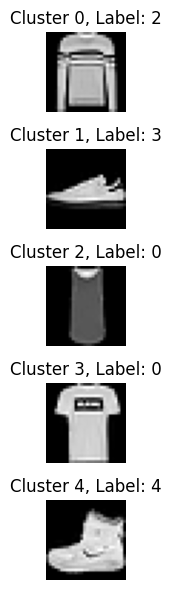


Analysis of Clusters:
Cluster 0: Possible Label - (2,)
Cluster 1: Possible Label - (3,)
Cluster 2: Possible Label - (2,)
Cluster 3: Possible Label - (0,)
Cluster 4: Possible Label - (4,)


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading the datasets
x_data = pd.read_csv('x_train.csv').astype('float32')
y_labels = pd.read_csv('y_train.csv').astype('int32')

# Perform PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
x_data_pca = pca.fit_transform(x_data)

# Performing K-Means clustering with 5 clusters on the original data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeansClusters = kmeans.fit_predict(x_data)

# Function to plot a representative image for each cluster
def plot_representative_images(num_images=1):
    plt.figure(figsize=(12, 6))
    
    for cluster_num in range(5):
        cluster_indices = np.where(kmeansClusters == cluster_num)[0]
        if len(cluster_indices) > 0:
            representative_idx = cluster_indices[:num_images]
            representative_images = x_data.iloc[representative_idx].values.reshape(-1, 28, 28)
            for i, image in enumerate(representative_images):
                plt.subplot(5, num_images, cluster_num * num_images + i + 1)
                plt.imshow(image, cmap='gray')
                plt.axis('off')
                plt.title(f'Cluster {cluster_num}, Label: {y_labels.iloc[representative_idx[i]].item()}')
    
    plt.tight_layout()
    plt.show()

# Plotting representative images for each cluster
plot_representative_images(num_images=1)

# Analyzing the clusters and suggesting possible labels
print("\nAnalysis of Clusters:")
for cluster_num in range(5):
    cluster_indices = np.where(kmeansClusters == cluster_num)[0]
    if len(cluster_indices) > 0:
        cluster_labels = y_labels.iloc[cluster_indices].value_counts().idxmax()
        print(f"Cluster {cluster_num}: Possible Label - {cluster_labels}")
    else:
        print(f"Cluster {cluster_num}: No data points")

